## Importing the Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

## Data Collection and Processing

In [2]:
# Loading the data from csv file and create Pandas DataFrame
sales_data = pd.read_csv('advertising.csv')

In [3]:
# print 5 rows of dataset.
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# print number of rows and columns 
sales_data.shape

(200, 4)

In [5]:
# print the information of dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# find the number of missing values in each column
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Performing Data Analysis

In [7]:
# Performing statistics for each column
sales_data.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualisation

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

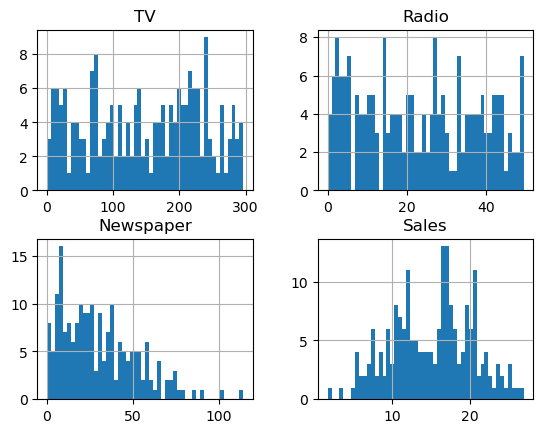

In [8]:
sales_data.hist(bins=50)

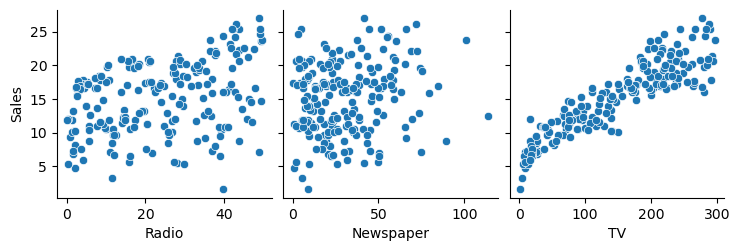

In [9]:
sb.pairplot(sales_data, x_vars = ['Radio', 'Newspaper', 'TV'], y_vars = 'Sales', kind = 'scatter')
plt.show()

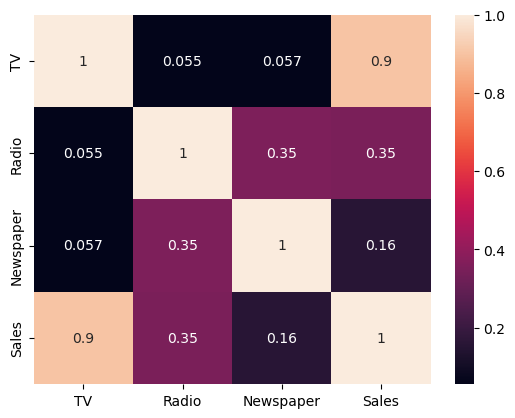

In [10]:
sb.heatmap(sales_data.corr(), annot = True)
plt.show()

## Data Splitting into testing and training

In [11]:
x = sales_data[['TV','Newspaper', 'Radio']]
y = sales_data['Sales']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
x_train.head()

,TV,Newspaper,Radio
71,109.8,31.7,14.3
124,229.5,74.2,32.3
184,253.8,30.0,21.3
97,184.9,22.0,21.0
149,44.7,20.6,25.8


In [14]:
y_train.head()

71     12.4
124    19.7
184    17.6
97     20.5
149    10.1
Name: Sales, dtype: float64

## Model Training

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation 

In [17]:
y_pred = model.predict(x_test)
print('Predicted Output:\n',y_pred)

Predicted Output:
 [10.69034418  8.68132435  9.59290052 24.88241319 14.68606352  8.36077587
 10.5898131  18.36838345  9.87359003 17.86306812 23.40835973 10.69153461
 13.38610616 17.09651474 11.7596204  13.31736836 21.13410725  9.13820326
 14.17420598 18.85121771 24.84655353 12.43749806 16.57128353 13.79857232
  7.80827038 15.12861077 14.68386733 20.66548775 16.96644118  8.90614184
 12.38904935 20.8124535  21.26609738 21.84309375  7.18768267  7.06323314
  9.23756125 15.58290474 13.29684701  7.27825284 10.96029997  9.12857882
 15.60175994 18.20653066 18.8457611  13.48625496  5.42016056 10.45332757
 15.51862918 10.94769952]


In [18]:
model.score(x,y)*100

90.22380089753528

In [19]:
model.coef_

array([ 5.34530806e-02, -4.37125135e-05,  1.10417563e-01])

In [20]:
model.intercept_

4.728630893324768

In [21]:
print("R2_score of model: ", r2_score(y_test, y_pred))
print("Mean Absolute Error of Model: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error of Model: ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score of model:  0.8718069474344206
Mean Absolute Error of Model:  1.3405402421444605
Root Mean Squared Error of Model:  1.9895610775935795


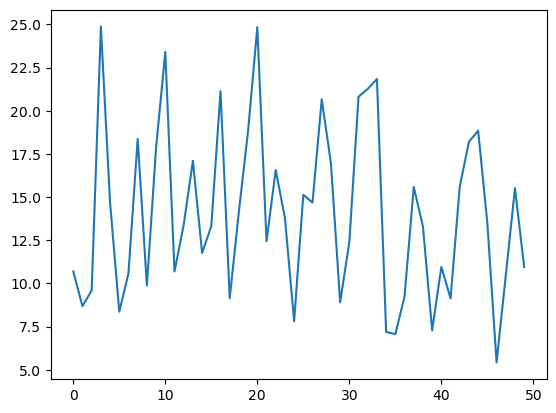

In [22]:
plt.plot(y_pred)